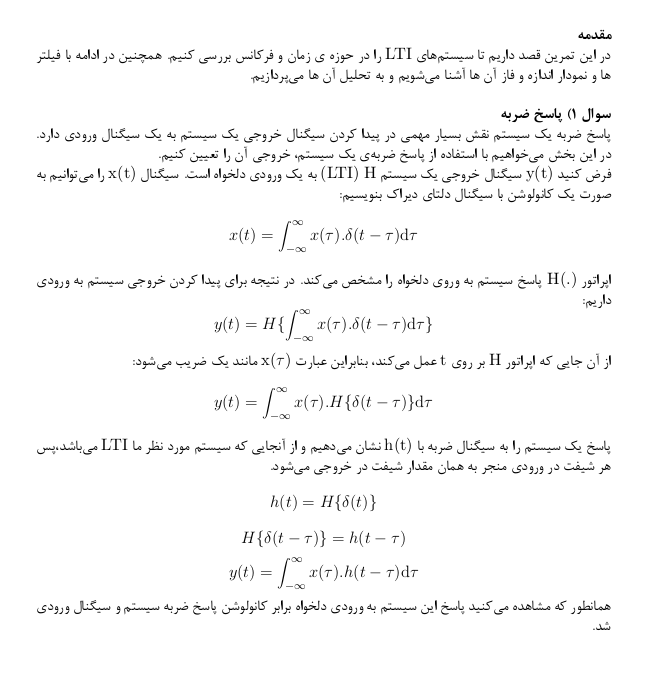

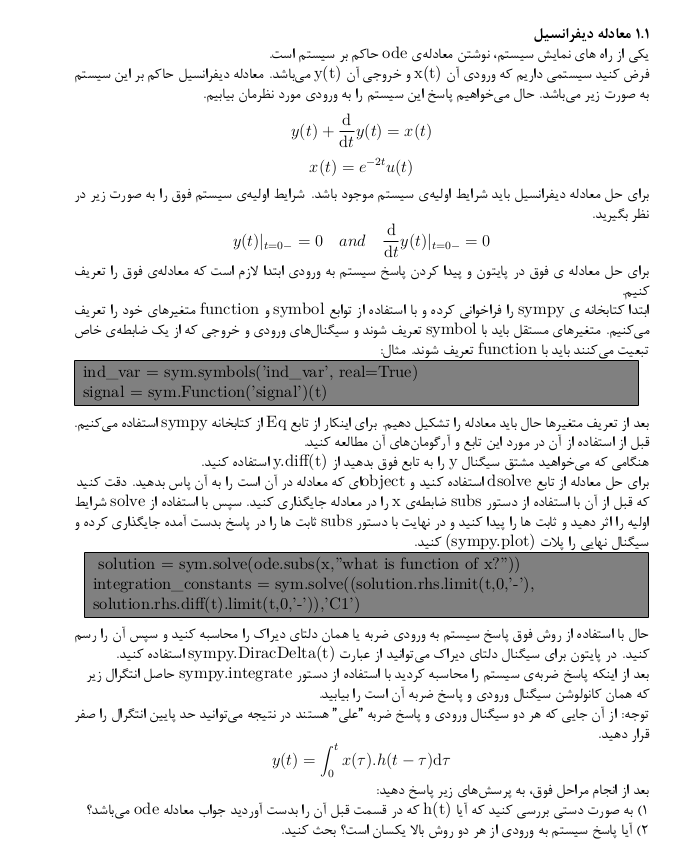

ابتدا با استفاده از دستورات زیر متغیر های مستقل که در اینجا زمان است رو مشخص می کنیم و سپس سیگنال های خود را که تابعی از زمان می باشد مشخص می سازیم و در نهایت معادله داده شده در صورت مسیله رو مدل می کنیم و سپس به ازای ورودی داده شده معادله را حل می کنیم

In [1]:
from sympy import *
import numpy as np
import sympy as sym
t = symbols('t',real = True)
y = Function('y')(t)
x = Function('x')(t)
equation = Eq(y + y.diff(t), x)
equation


Eq(y(t) + Derivative(y(t), t), x(t))

معادله و جواب نهایی بدون توجه به مقادیر اولیه آورده شده است.

In [2]:
solution = dsolve(equation.subs(x,exp(-2*t)*Heaviside(t)))
solution

Eq(y(t), (C1 + (1 - exp(-t))*Heaviside(t))*exp(-t))

پاسخ عمومی معادله بدون توجه به شرایط مرزی به صورت بالا خواهد بود


مقادیر اولیه را با دستور زیر بدست می آوریم و در معادله اصلی قرار می دهیم.

In [3]:
solve(solution.rhs.limit(t,0,'-') , solution.rhs.diff(t).limit(t,0,'-'),'C1')

[{C1: 0}]

In [4]:
solution = solution.subs('C1' , 0)
solution

Eq(y(t), (1 - exp(-t))*exp(-t)*Heaviside(t))

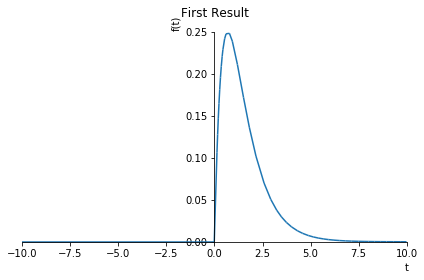

In [5]:
sym.plot((1-exp(-t))*exp(-t)*Heaviside(t),title = "First Result")

حال پاسخ سیستم را برای ضربه بدست می آوریم

In [6]:
sol_h = dsolve(equation.subs(x,DiracDelta(t)))
h = Function('h')(t)
sol_h

Eq(y(t), (C1 + Heaviside(t))*exp(-t))

In [7]:
solve(sol_h.rhs.limit(t,0,'-') , sol_h.rhs.diff(t).limit(t,0,'-'),'C1')

[{C1: 0}]

In [8]:
sol_h = sol_h.subs('C1' , 0)
sol_h

Eq(y(t), exp(-t)*Heaviside(t))

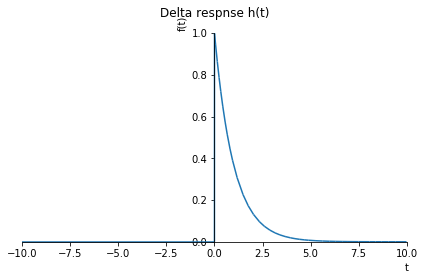

In [9]:
sym.plot(exp(-t)*Heaviside(t),title="Delta respnse h(t)")

در اینجا برای به دست آوردن خروجی نسبت به ورودی از کانولوشن وروردی در پاسخ ضربه استفاده می کنیم و انتظار داریم پاسخ با حالت ابتدایی برابر شود

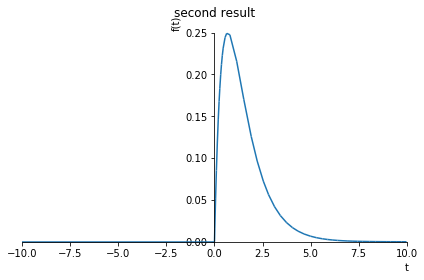

In [10]:
from sympy import oo, Symbol, integrate
def convolve(f, g, t, lower_limit=-oo, upper_limit=t):
    a = Symbol('a', real=True)
    return integrate(f.subs(t, a) * g.subs(t, t - a), 
                     (a, 0, upper_limit))



result = convolve(exp(-2*t)*Heaviside(t),exp(-t)*Heaviside(t),t)

sym.plot(result,title="second result")


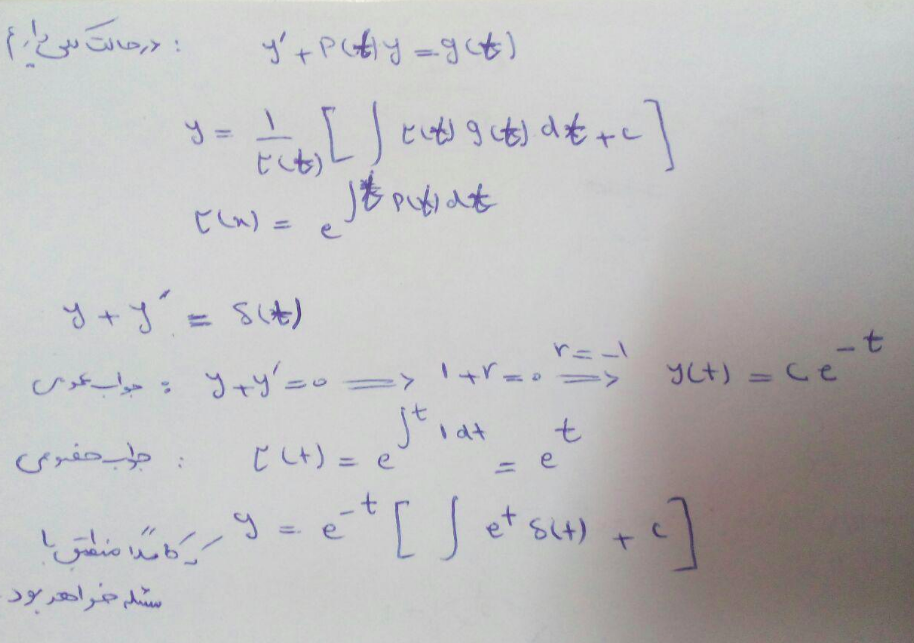

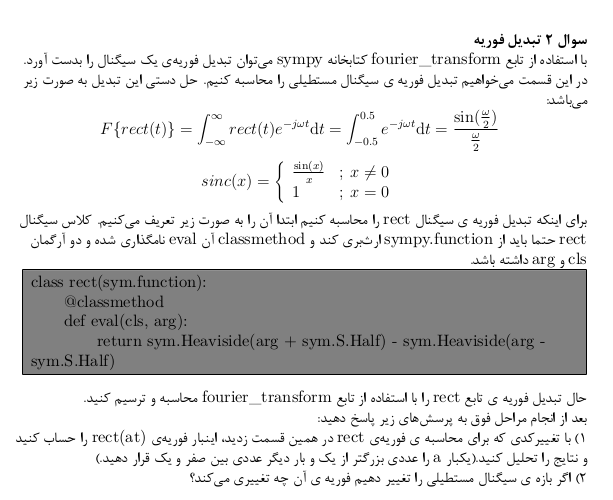

مطابق توضیحات داده شده تابع زیر را پیاده می کنیم و آن را در زیر نمایش می دهیم

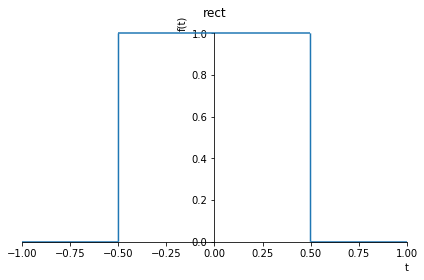

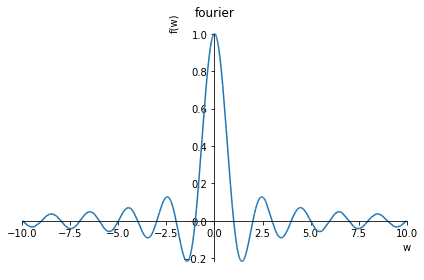

In [11]:
class rect(Function):
    @classmethod
    def eval(cls, arg):
        return Heaviside(arg+S.Half) - Heaviside(arg-S.Half)
sym.plot(rect(t),(t,-1,1),title="rect")

from sympy.abc import t,w
F1 = fourier_transform(rect(t),t,w)
sym.plot(F1 , title = "fourier")

حال تبدیل فوریه تابع رو بدست می آوریم.

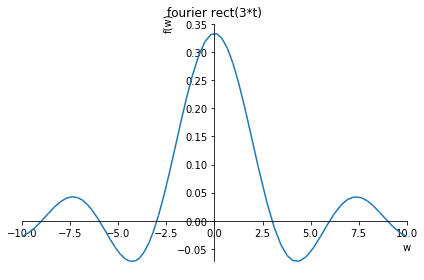

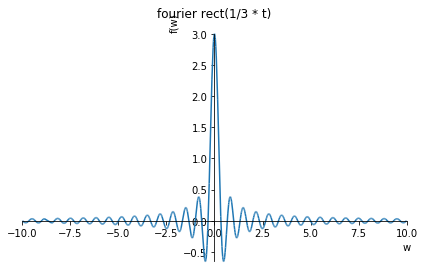

In [12]:

F_more = fourier_transform(rect(3*t),t,w)
F_less = fourier_transform(rect(1/3*t),t,w)

sym.plot(F_more , title= "fourier rect(3*t)")
sym.plot(F_less , title = "fourier rect(1/3 * t)")


با توجه به شکل های بالا فرمول زیر کاملا توجیه پذیر خواهد بود
Time scaling

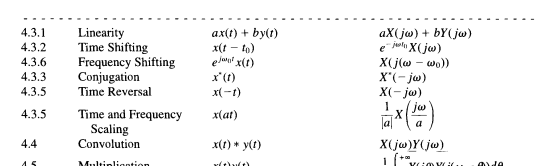

حال بازه ی سیگنال را عوض می کنیم تا متوجه شویم تغییرات به چه صورت خواهد بود

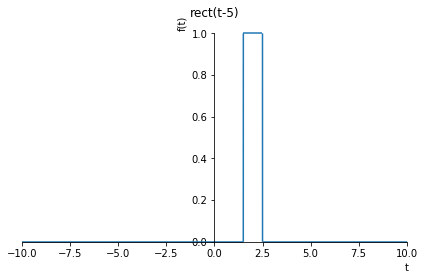

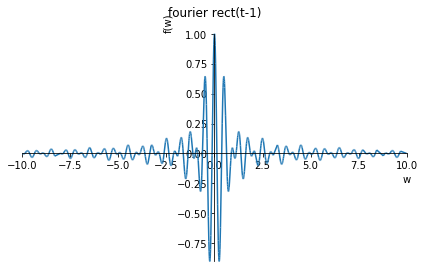

In [27]:
sym.plot(rect(t-2),title = "rect(t-5)")
F_shift = fourier_transform(rect(t-2),t,w)
sym.plot(sym.re(F_shift),title="fourier rect(t-1)")

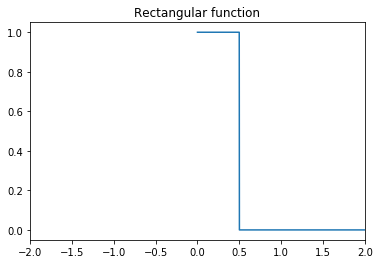

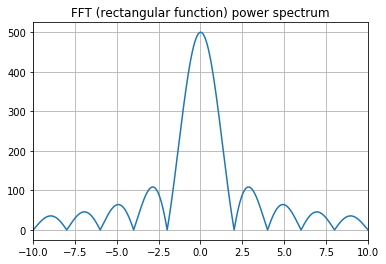

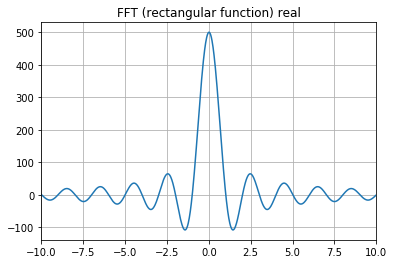

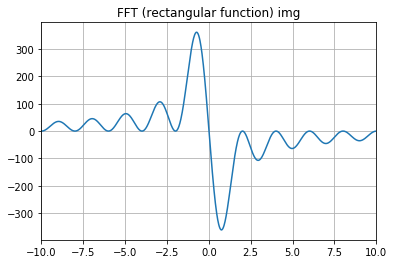

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
N = 50000 # Number of samplepoints

T = 1.0 / 1000.0 # sample spacing

x = np.linspace(0.0, N*T, N)

y = np.zeros(x.shape)

for i in range(x.shape[0]):
    if x[i] > -0.5 and x[i] < 0.5: 
        y[i] = 1.0


plt.plot(x,y)

plt.xlim(-2,2)

plt.title(r'Rectangular function')
plt.show()
# plt.savefig('fourrier_transform_rectangular.png', bbox_inches='tight')

plt.close()

yf = scipy.fftpack.fft(y)

yf = np.fft.fftshift(yf)

xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)


fig, ax = plt.subplots()

ax.plot(xf, np.abs(yf) )

plt.xlim(-10,10)
plt.title('FFT (rectangular function) power spectrum')

plt.grid()
plt.show()
# plt.savefig('fourrier_transform_rectangular_abs.png', bbox_inches='tight')

plt.close()

fig, ax = plt.subplots()

ax.plot(xf, np.real(yf) )

plt.xlim(-10,10)
plt.title('FFT (rectangular function) real')

plt.grid()

# plt.savefig('fourrier_transform_rectangular_real.png', bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots()

ax.plot(xf, np.imag(yf) )

plt.xlim(-10,10)
plt.title('FFT (rectangular function) img')

plt.grid()
plt.show()
# plt.savefig('fourrier_transform_rectangular_imag.png', bbox_inches='tight')

plt.close()

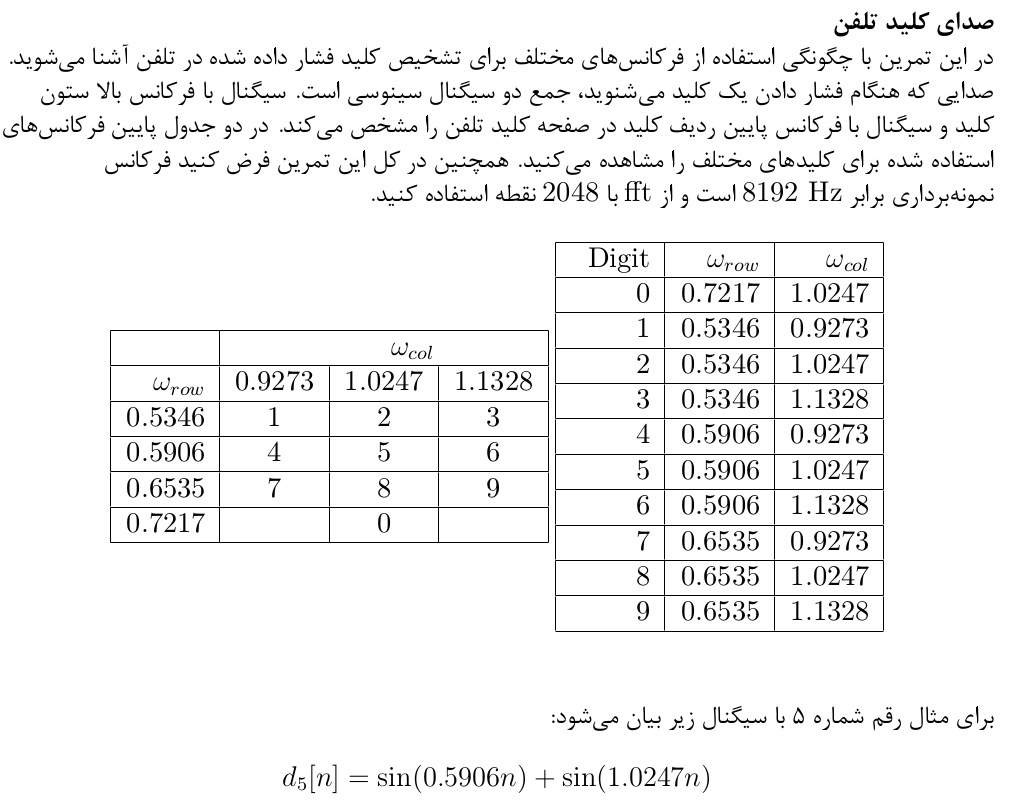

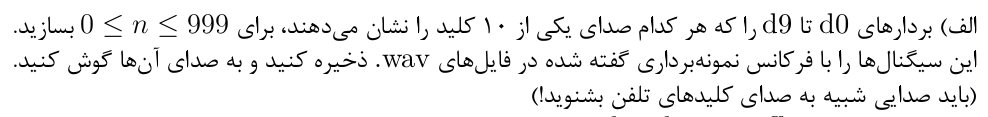

In [15]:
import numpy as np
import csv
import sys

from scipy.io import wavfile
from numpy import fft
from matplotlib import pyplot as plt
from scipy import signal
csv.field_size_limit(sys.maxsize)

def part1():
    n = np.array([n for n in range(0, 1000)])
    c = [[0.7217, 1.0247], [0.5346, 0.9273], [0.5346, 1.0247], [0.5346, 1.1328], [0.5906, 0.9273], [0.5906, 1.0247], [0.5906, 1.1328], [0.6535, 0.9273], [0.6535, 1.0247], [0.6535, 1.1328]]
    d = [[] for x in range(0,10)]
    for x in range(0,10):
        d[x] = np.sin(c[x][0]*n) + np.sin(c[x][1]*n)
    for x in range(0,10):
        wavfile.write("./q4/part1/q4_part1_" + str(x) + '.wav', 8192 , d[x])
part1()


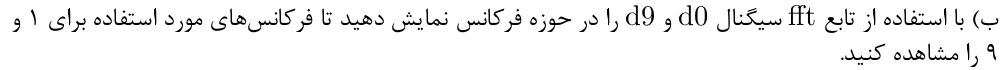

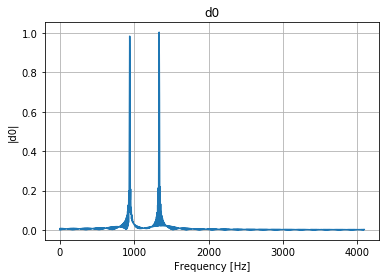

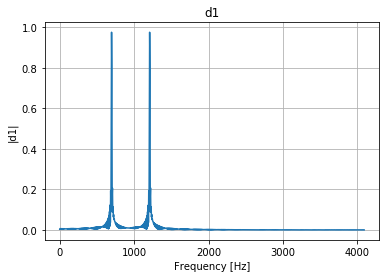

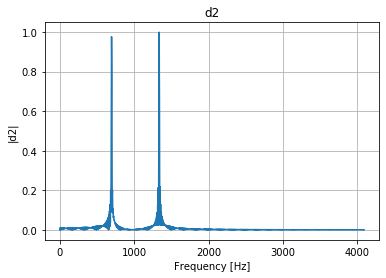

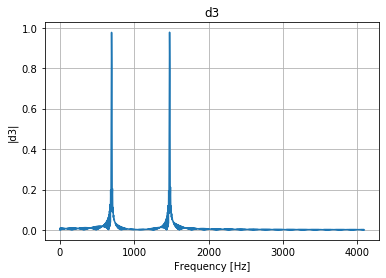

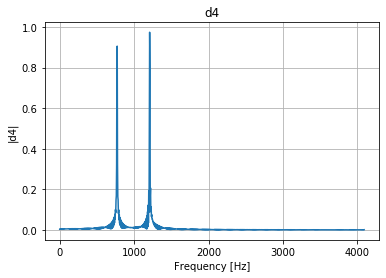

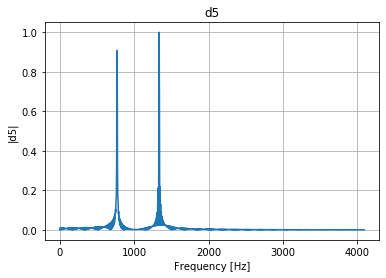

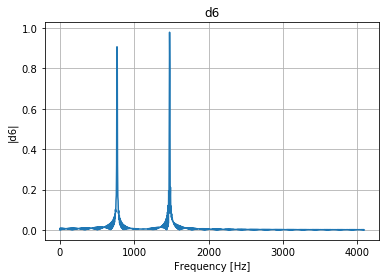

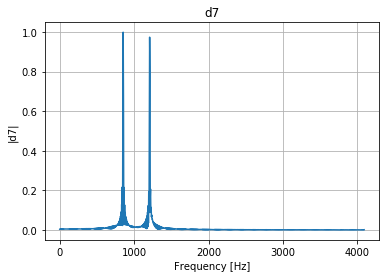

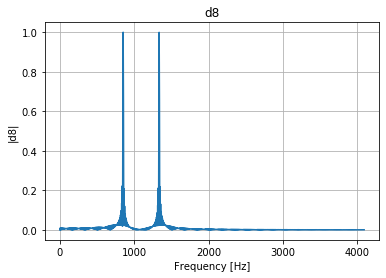

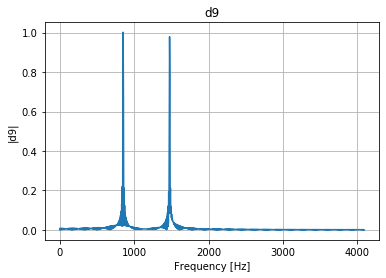

In [16]:
def part2():
    n = np.array([n for n in range(0, 1000)])
    c = [[0.7217, 1.0247], [0.5346, 0.9273], [0.5346, 1.0247],
         [0.5346, 1.1328], [0.5906, 0.9273], [0.5906, 1.0247],
         [0.5906, 1.1328], [0.6535, 0.9273], [0.6535, 1.0247], [0.6535, 1.1328]]
    
    d = [[] for x in range(0,10)]
    for x in range(0,10):
        d[x] = np.sin(c[x][0]*n) + np.sin(c[x][1]*n)
    for x in range(0,10):
        L = len(d[x])
        X = fft.fft(d[x], n=2048)
        X_abs = 2* np.absolute(X) / L
        half = 1024
        freq = fft.fftfreq(2048, d = 1./8192 )
        fig, ax = plt.subplots(1, 1)
        ax.plot(freq[:half], X_abs[:half])
        ax.set_title('d' + str(x))
        ax.set_xlabel('Frequency [Hz]')
        ax.set_ylabel('|d' +str(x)+'|')
        ax.grid()
        plt.show()

part2()



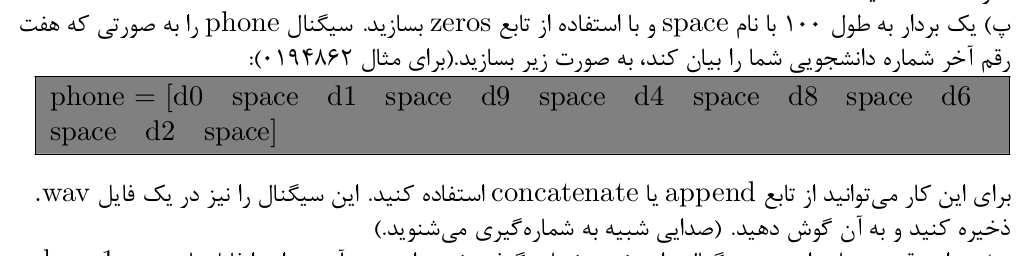

In [17]:
def part3():
    n = np.array([n for n in range(0, 1000)])
    space = np.zeros(100)
    c = [[0.7217, 1.0247], [0.5346, 0.9273], [0.5346, 1.0247], [0.5346, 1.1328], [0.5906, 0.9273], [0.5906, 1.0247], [0.5906, 1.1328], [0.6535, 0.9273], [0.6535, 1.0247], [0.6535, 1.1328]]
    d = [[] for x in range(0,10)]
    for x in range(0,10):
        d[x] = np.sin(c[x][0]*n) + np.sin(c[x][1]*n)
    pattern = [0,-1,1,-1,9,-1,6,-1,4,-1,7,-1,4,-1]
    phone = []
    for x in pattern:
        if x == -1:
            phone.extend(space)
        else:
            phone.extend(d[x])
    wavfile.write('./q4/part3/sid.wav', 8192 , np.array(phone))

part3()

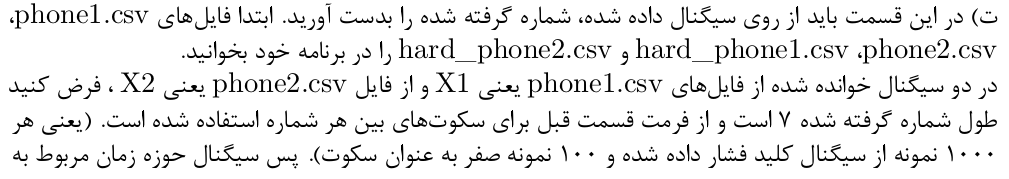

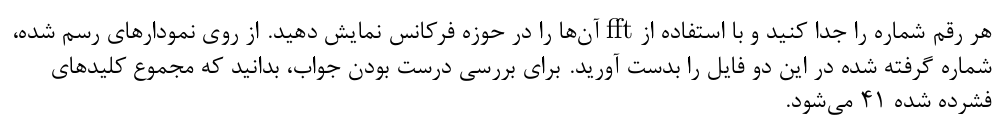

/home/alireza/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


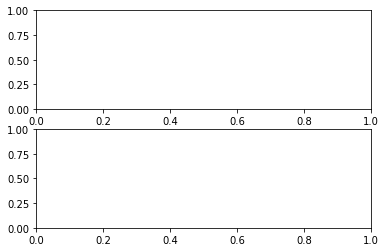

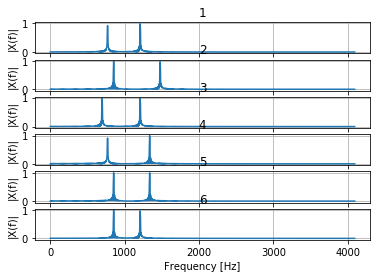

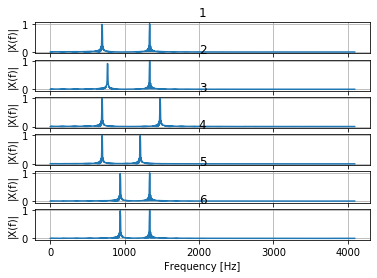

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft
from scipy.io import wavfile
row = [0.7217,0.5346, 0.5346, 0.5346,
         0.5906, 0.5906, 0.5906,
         0.6535, 0.6535, 0.6535,
         ]
col = [1.0247, 0.9273, 1.0247, 1.1328,
         0.9273, 1.0247, 1.1328,
         0.9273, 1.0247, 1.1328,
        ]

phone = []
fig, ax = plt.subplots(2, 1)
space = np.zeros(100)
phone_read = []
num_phone1 = []
num_phone2 = []

def plot_num(inp):
    fig, ax = plt.subplots(len(inp), 1)
    for i, j in enumerate(inp):
        L = len(j)
        X = fft.fft(j, n=2048)
        X_abs = 2 * np.abs(X) / L
        freq = fft.fftfreq(2048, d=1 / 8192)
        ax[i].plot(freq[:1024], X_abs[:1024])
        ax[i].set_title(i + 1)
        ax[i].set_xlabel('Frequency [Hz]')
        ax[i].set_ylabel('|X(f)|')
        ax[i].grid()

def main():
    n = np.arange(1000.0)
    for i in range(10):
        phone.append(np.sin(row[i] * n) + np.sin(col[i] * n))
        wavfile.write("./q2/{}_phone.wav".format(i), 8192, phone[i])
    phone_read.append(list(map(float, open("phone1.csv").readline().split(','))))
    phone_read.append(list(map(float, open("phone2.csv").readline().split(','))))
    for i in range(2):
        while len(phone_read[i]) > 1000:
            if i == 0:
                num_phone1.append(phone_read[i][:1000])
            else:
                num_phone2.append(phone_read[i][:1000])
            phone_read[i] = phone_read[i][1100:]
    plot_num(num_phone1)
    plot_num(num_phone2)
    plt.tight_layout()
    plt.show()
if __name__ == '__main__':
    main()

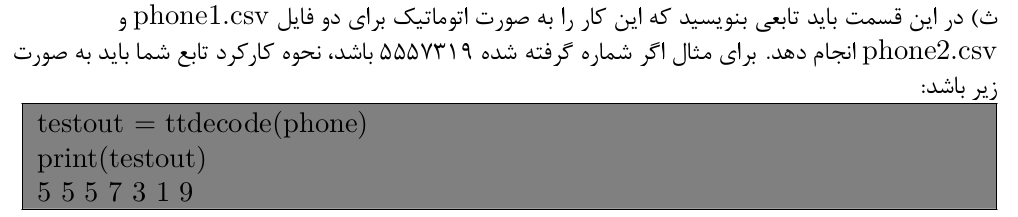

In [19]:
def ttdecode(inlist):
    n = np.array([n for n in range(0, 1000)])
    c = [[0.7217, 1.0247], [0.5346, 0.9273], [0.5346, 1.0247], [0.5346, 1.1328], [0.5906, 0.9273], [0.5906, 1.0247], [0.5906, 1.1328], [0.6535, 0.9273], [0.6535, 1.0247], [0.6535, 1.1328]]
    d = [[] for x in range(0,10)]
    for x in range(0,10):
        d[x] = np.sin(c[x][0]*n) + np.sin(c[x][1]*n)
    dt = np.zeros((7,1000))
    base = 0
    for x in range(0,7):
        for i in range(0,1000):
            dt[x][i] = inlist[base+i]
        base += 1100
    result=[]
    for x in range(0,7):
        for y in range(0,10):
            if np.allclose(dt[x],d[y],atol=1):
                result.append(y)
                break
    return result


def part5():
    phoneReader = [[], []]
    phoneReader[0] = np.array(list(csv.reader(open('phone1.csv'), delimiter=',')))
    phoneReader[1] = np.array(list(csv.reader(open('phone2.csv'), delimiter=',')))
    for r in range(0,2):
        testout = ttdecode(phoneReader[r][0])
        print(testout)

part5()

[4, 9, 1, 5, 8, 7, 7]
[2, 5, 3, 1, 0, 0, 0]


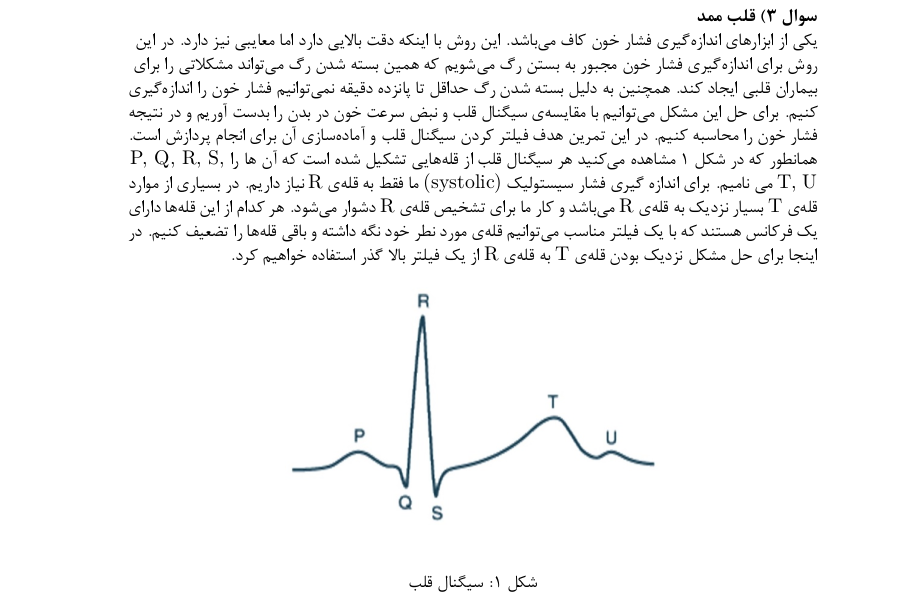

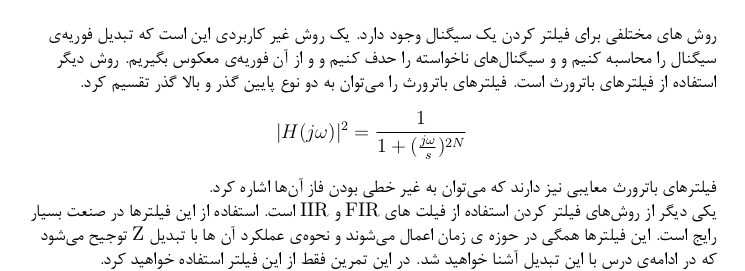

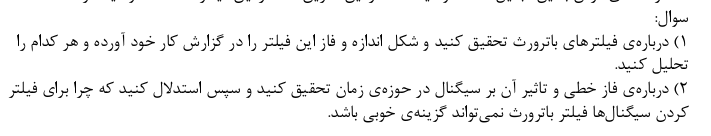

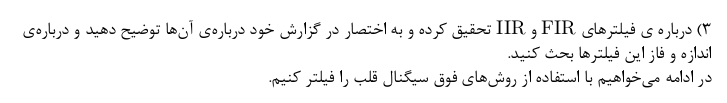

https://www.sciencedirect.com/topics/engineering/fir-filters


http://www.iowahills.com/A8FirIirDifferences.html

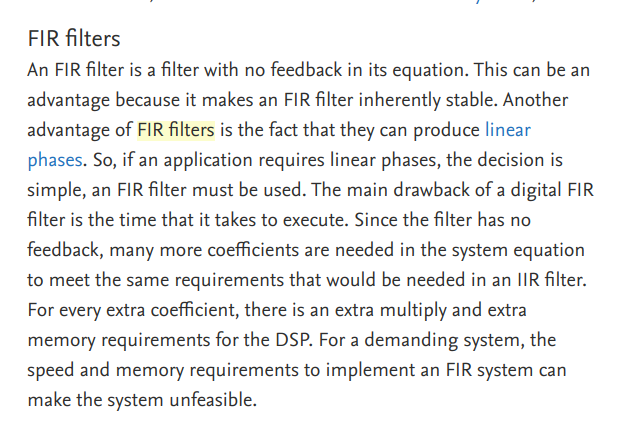

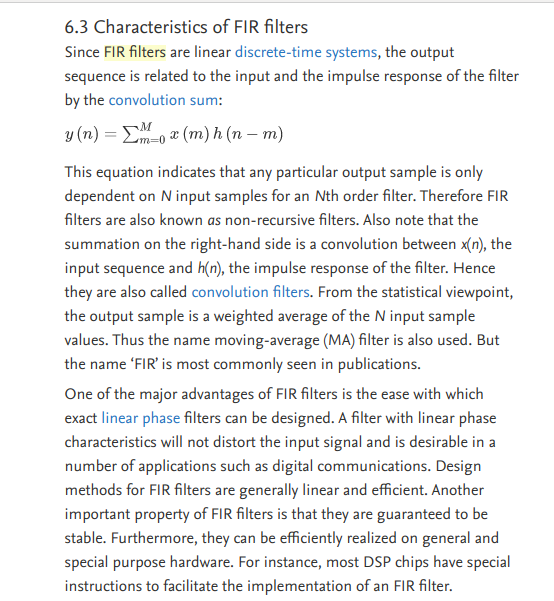

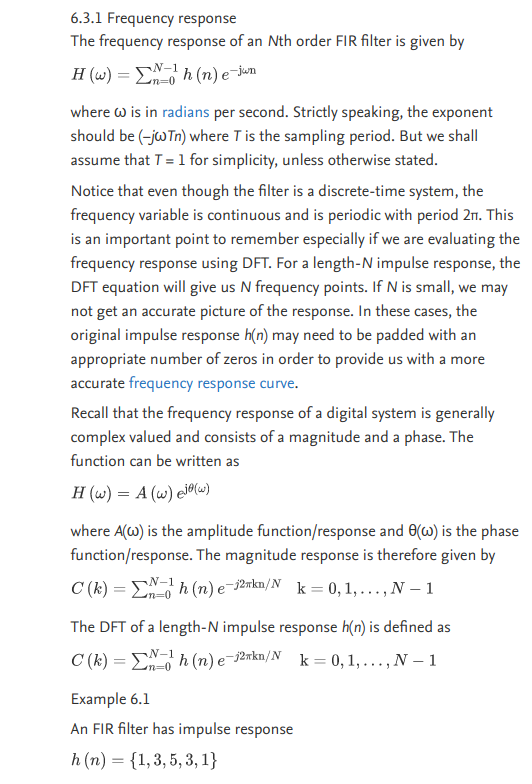

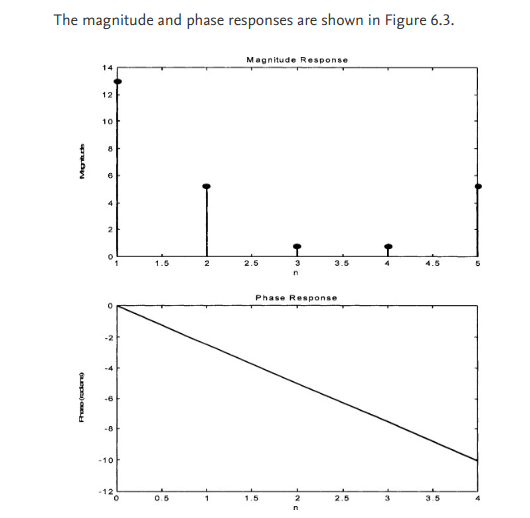

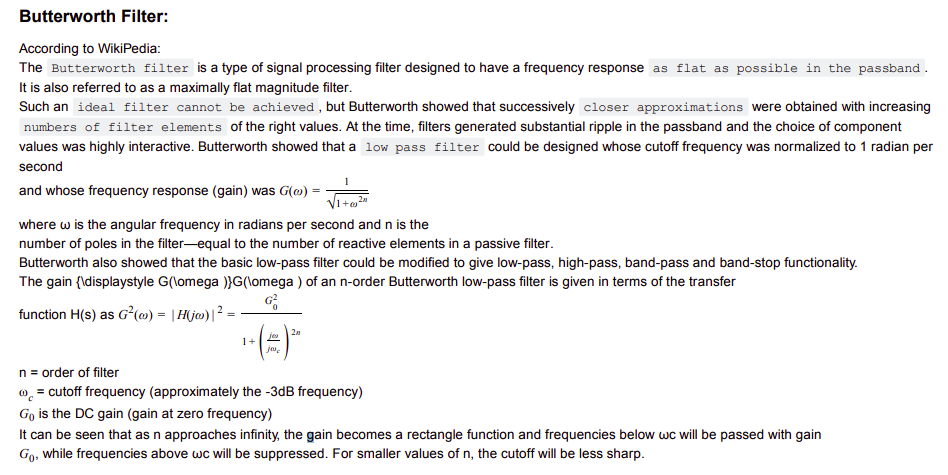

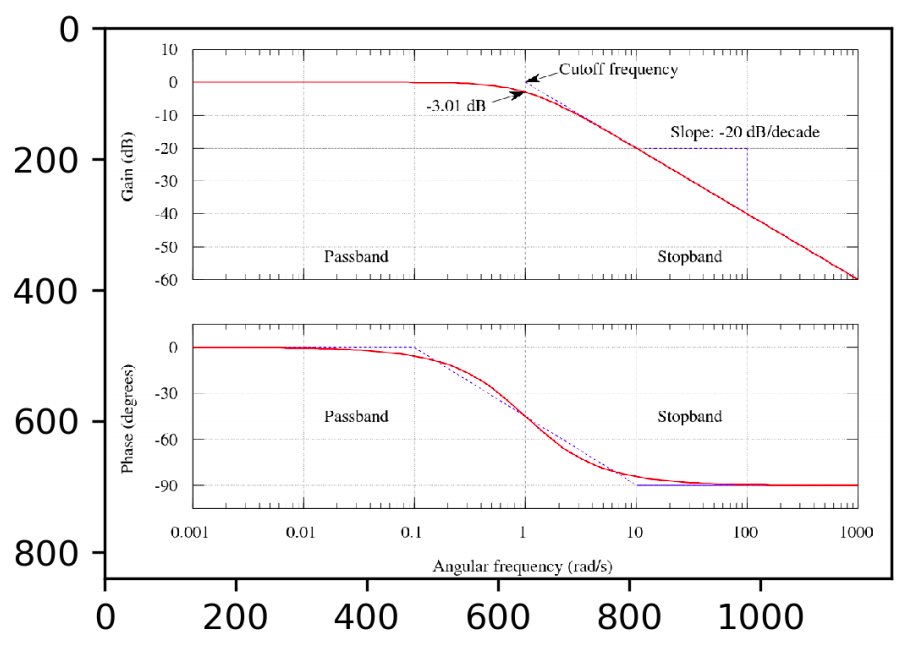

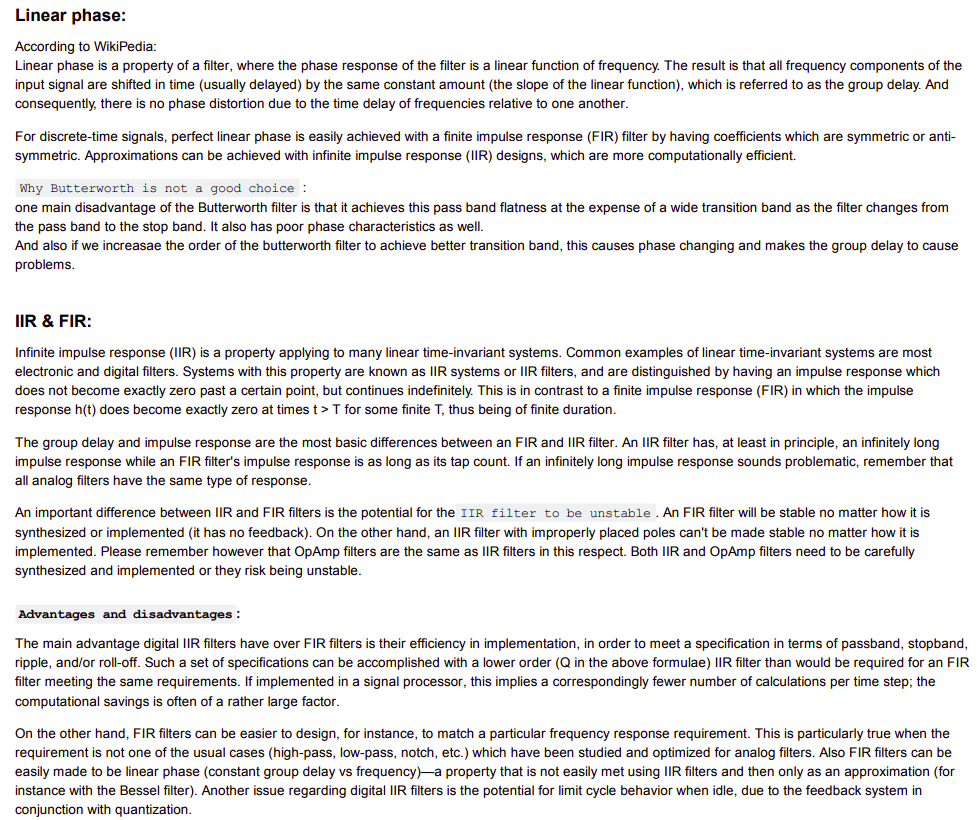

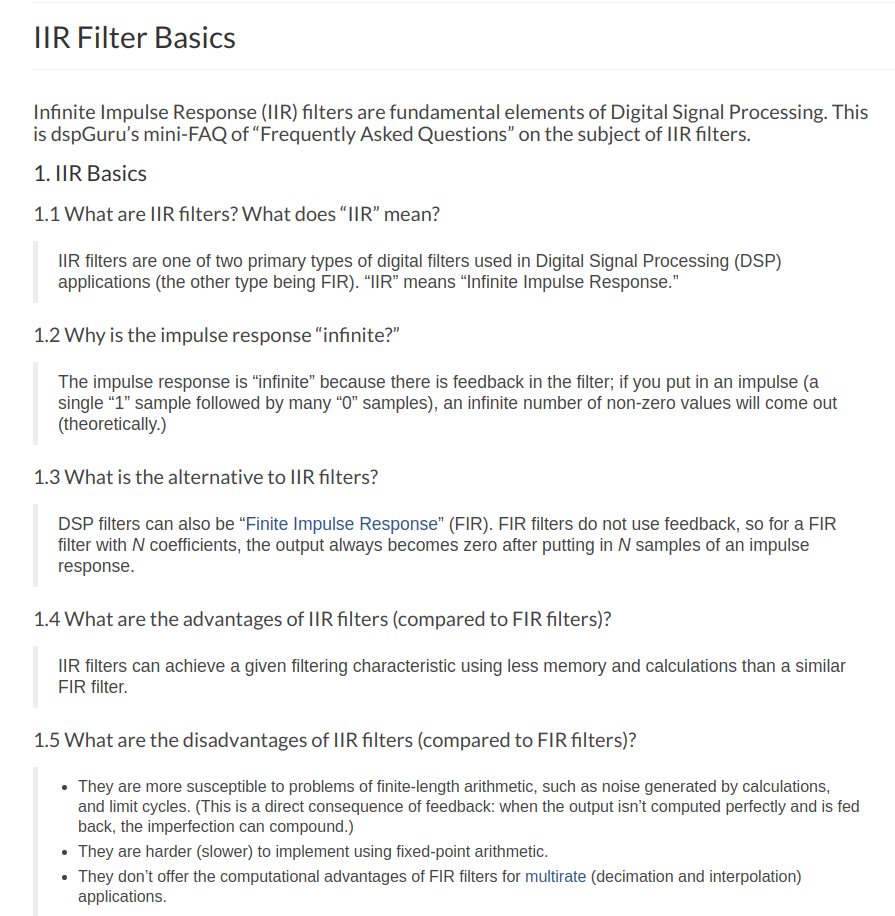

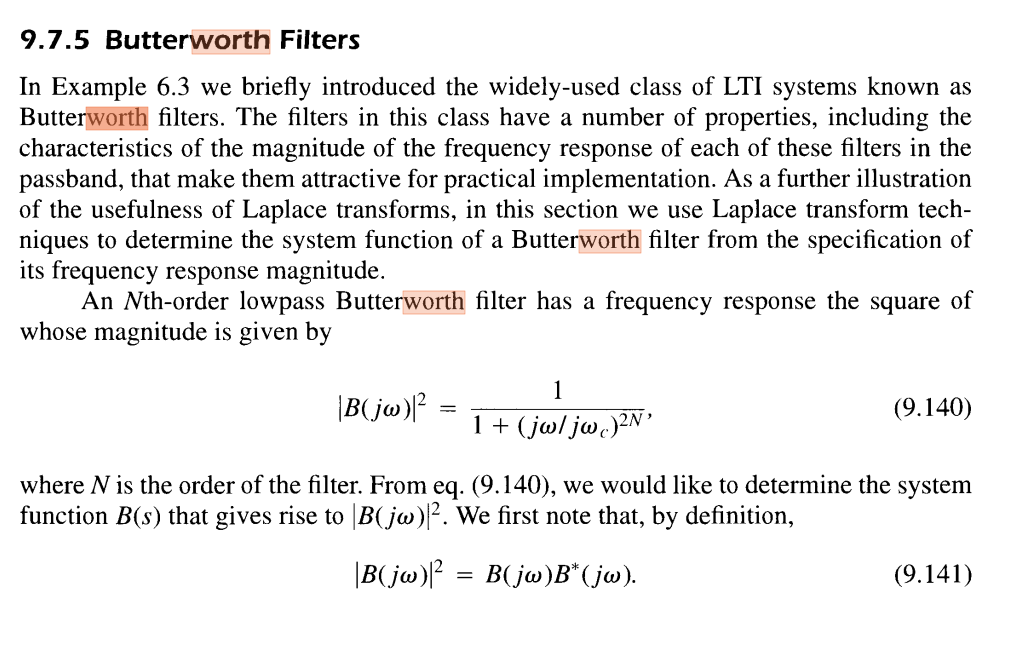

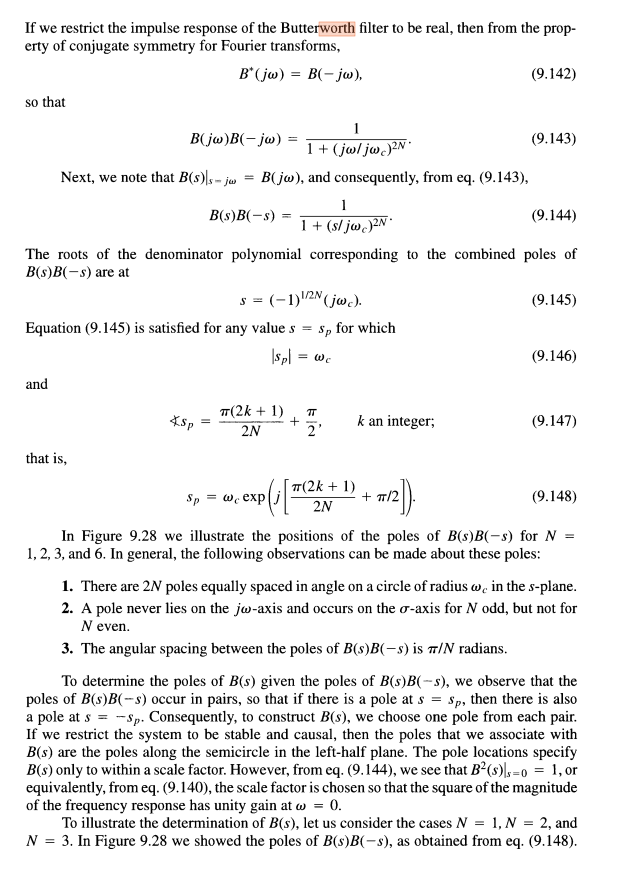

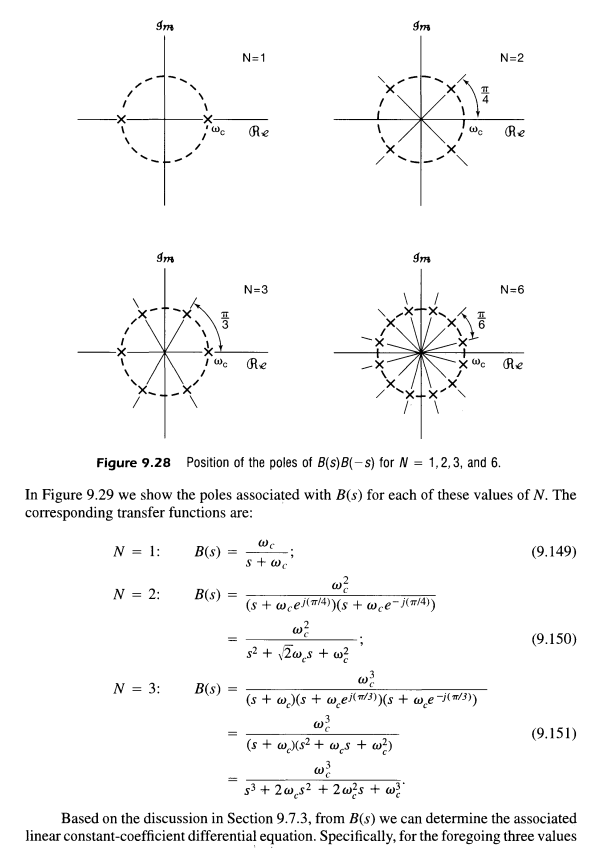

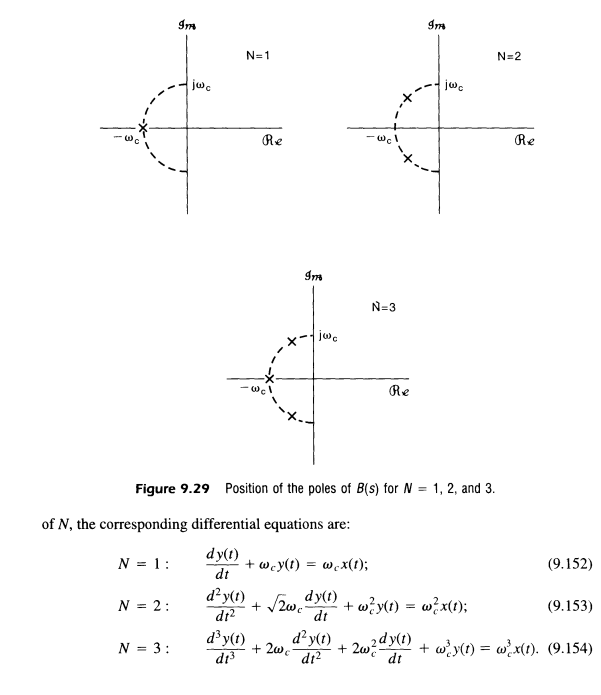

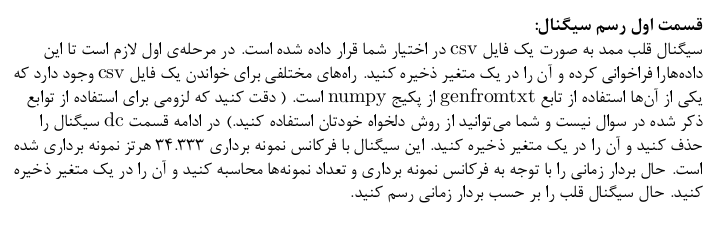

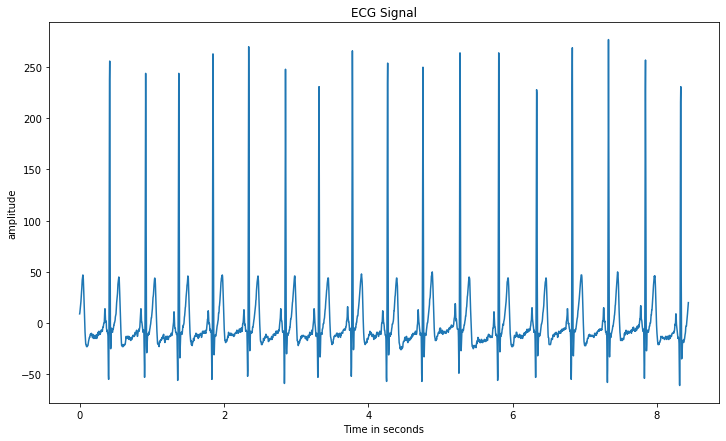

In [20]:
ecg_filename = "ecg.csv"
input_data = np.genfromtxt(ecg_filename  , delimiter=",")
##after removing DC
input_data = input_data - np.mean(input_data)
N = len(input_data)
frequency = 333.334
times = []
for i in range(N):
    times.append(i*1/frequency)
    
    
fig= plt.figure(figsize=(12,7))   
plt.plot(times,input_data)
plt.xlabel('Time in seconds')
plt.ylabel('amplitude')
plt.title('ECG Signal')
plt.show()




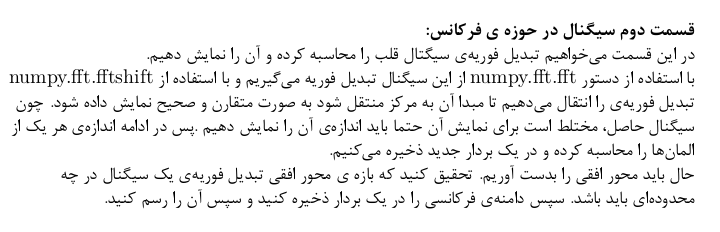

بازه محور افقی تبدیل فوریه یک سیگنال
باید بین نصف فرکانس سمپلینگ و در یک بازه ی متقارن باشد


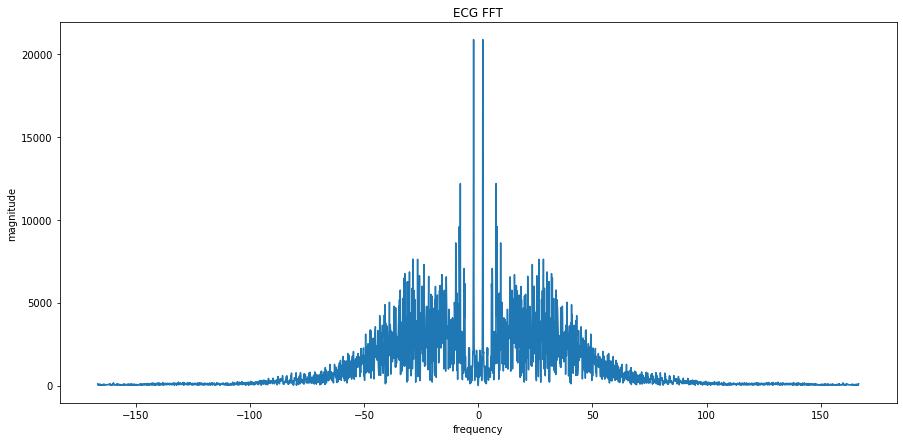

In [21]:
w_axis_ecg = np.fft.fftfreq(len(input_data),1/frequency)
plt.figure(figsize=(15,7))   
plt.plot(np.fft.fftshift(w_axis_ecg) , np.fft.fftshift(np.absolute(np.fft.fft(input_data))))
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.title('ECG FFT')
plt.show()



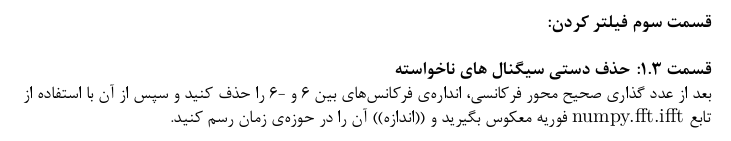

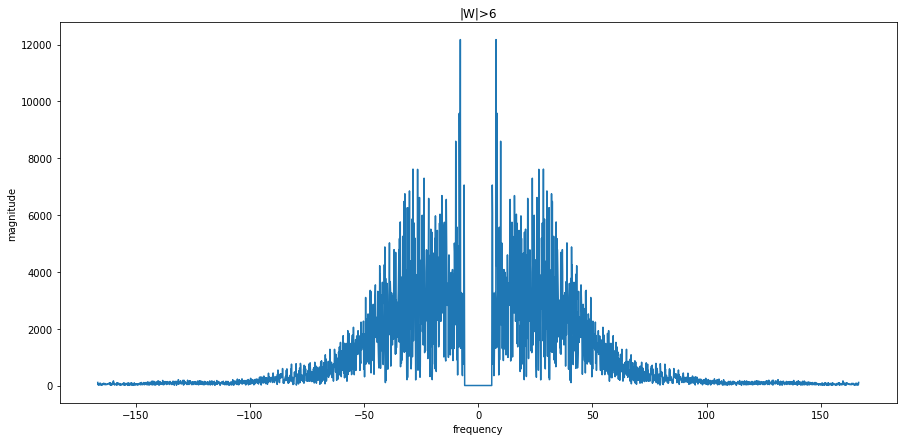

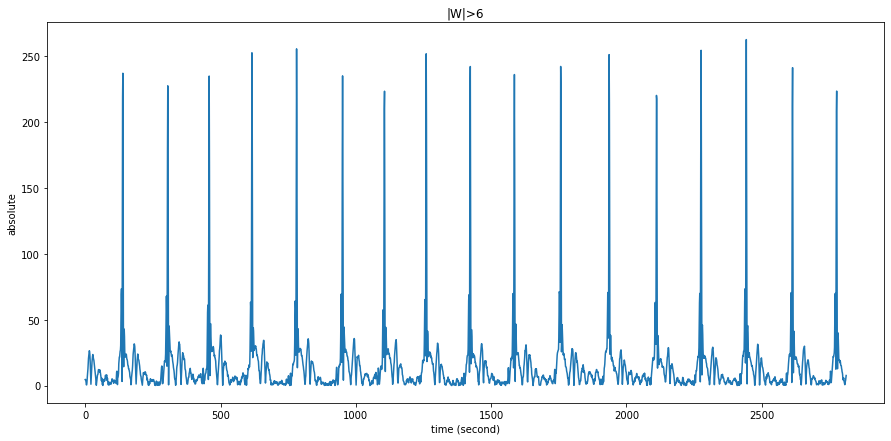

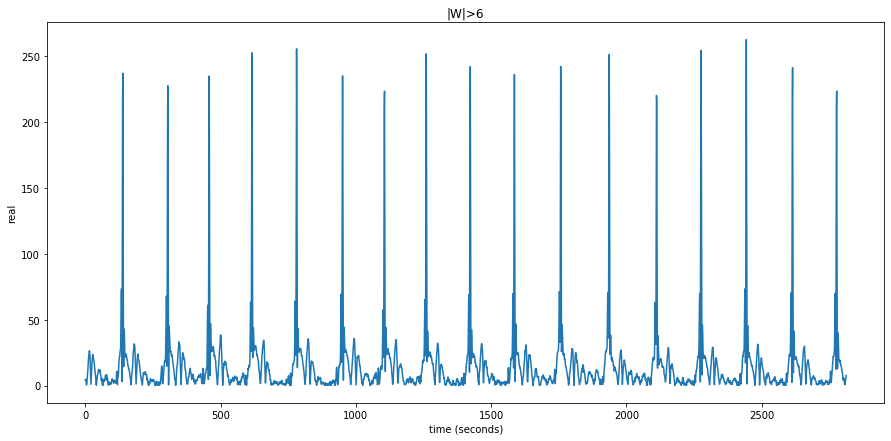

In [22]:



times = list(range(len(input_data)))
filtered_manual =  np.fft.fft(input_data)
filtered_manual[np.where((w_axis_ecg<=6) & (w_axis_ecg>=-6))]=0

fig= plt.figure(figsize=(15,7))   
plt.plot(np.fft.fftshift(w_axis_ecg),np.fft.fftshift(np.absolute(filtered_manual)))
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.title('|W|>6')
plt.show()


fig= plt.figure(figsize=(15,7))   
plt.plot(times,np.absolute(np.fft.ifft(filtered_manual)))
plt.xlabel('time (second)')
plt.ylabel('absolute')
plt.title('|W|>6')
plt.show()




fig= plt.figure(figsize=(15,7))   
plt.plot(times,np.absolute(np.real(np.fft.ifft(filtered_manual))))
plt.xlabel('time (seconds)')
plt.ylabel('real')
plt.title('|W|>6')
plt.show()


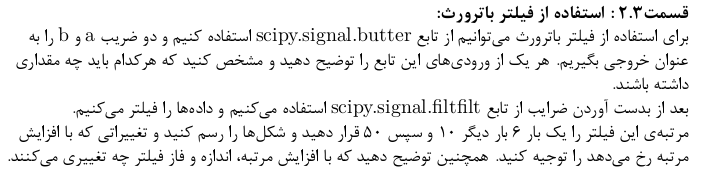

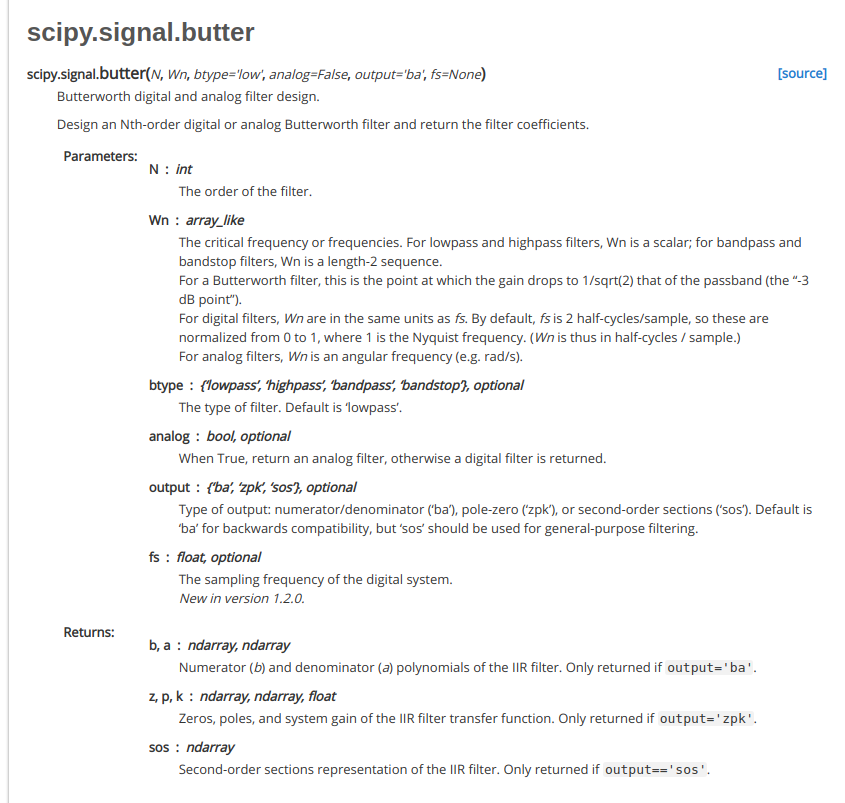

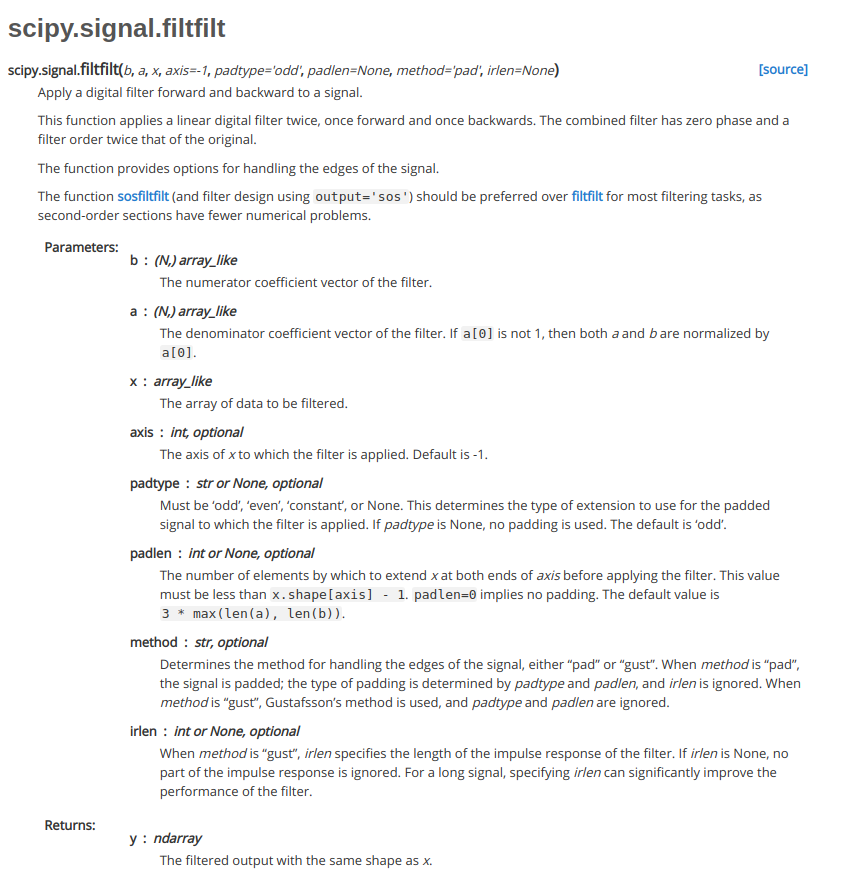

باید فرکانس سمپلینگ ما حداقل از دو برابر فرکانس خود سیگنال اصلی بیشتر باشه تا سیگنالو بتونیم بازسازی کنیم

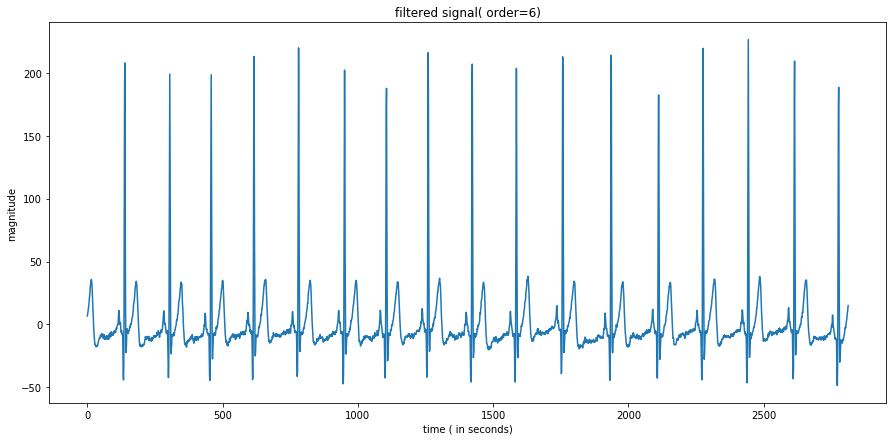

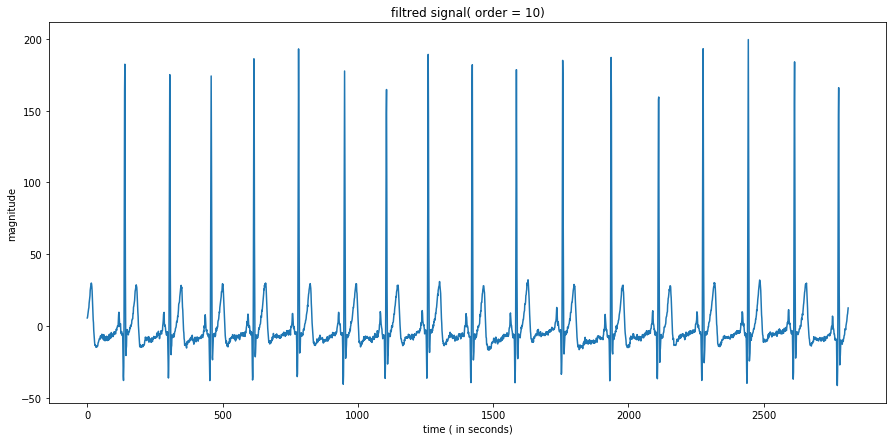

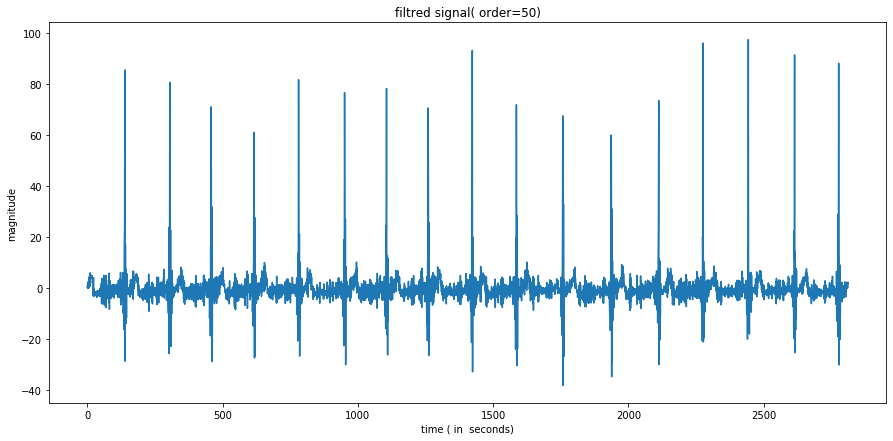

In [23]:
nyqt = .5 * frequency
b, a = signal.butter(6, 6/nyqt, 'highpass', analog=True)
filter_data = signal.filtfilt(b,a,input_data)

fig= plt.figure(figsize=(15,7))   
plt.plot(filter_data)
plt.xlabel('time ( in seconds)')
plt.ylabel('magnitude')
plt.title('filtered signal( order=6)')
plt.show()


nyqt = .5 * frequency
b, a = signal.butter(10, 6/nyqt, 'highpass', analog=True)
filter_data = signal.filtfilt(b,a,input_data)

fig= plt.figure(figsize=(15,7))   
plt.plot(filter_data)
plt.xlabel('time ( in seconds)')
plt.ylabel('magnitude')
plt.title('filtred signal( order = 10)')
plt.show()


nyqt = .5 * frequency
b, a = signal.butter(50, 6/nyqt, 'highpass', analog=True)
filter_data = signal.filtfilt(b,a,input_data)

fig= plt.figure(figsize=(15,7))   
plt.plot(filter_data)
plt.xlabel('time ( in  seconds)')
plt.ylabel('magnitude')
plt.title('filtred signal( order=50)')
plt.show()


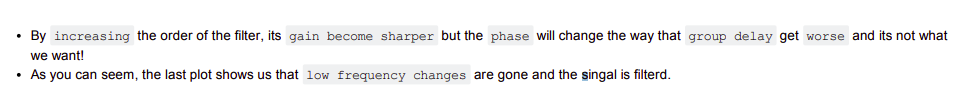

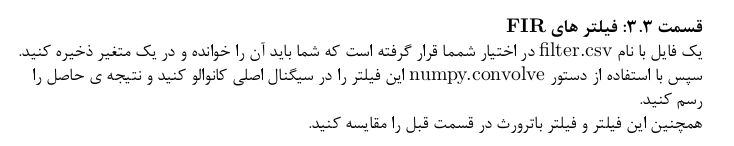

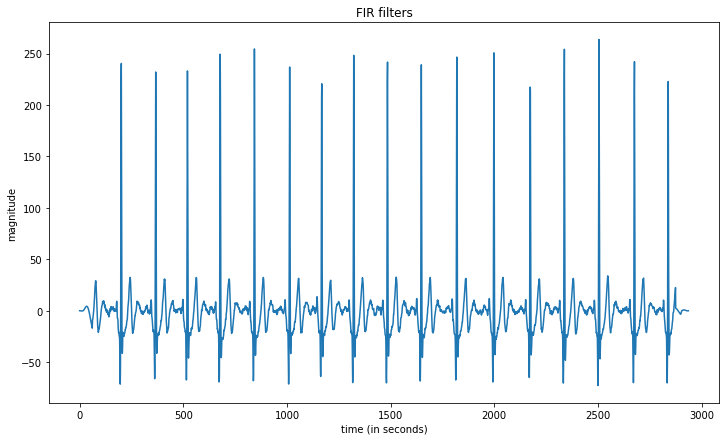

In [24]:
filter_filename = "filter.csv"
filter_array = np.genfromtxt(filter_filename , delimiter=",")
result_convolve =  np.convolve(input_data,filter_array)

fig= plt.figure(figsize=(12,7))   
plt.plot(result_convolve)
plt.xlabel('time (in seconds)')
plt.ylabel('magnitude')
plt.title('FIR filters')
plt.show()



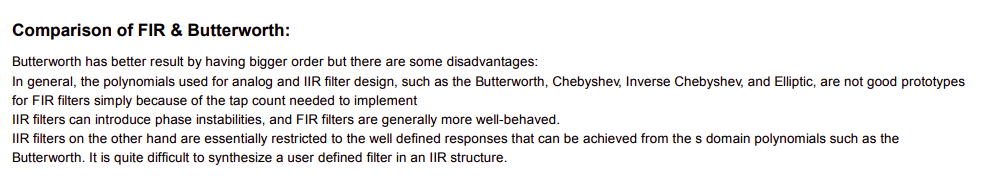